In [1]:
import numpy as np 
import pandas as pd

In [2]:
ds = pd.read_csv('fraudTest.csv')

In [3]:
ds.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
ds.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [5]:
X = ds.iloc[:,[2,5,8,13,14,15,16,20,21]].values
Y = ds.iloc[:,-1].values

In [6]:
X.shape

(555719, 9)

In [7]:
Y.shape

(555719,)

In [8]:
from imblearn.over_sampling import SMOTE

In [9]:
#sm = SMOTE()
#X,Y = sm.fit_resample(X,Y)

In [10]:
X[:5,:]

array([[2291163933867244, 2.86, 'M', 33.9659, -80.9355, 333497,
        'Mechanical engineer', 33.986391, -81.200714],
       [3573030041201292, 29.84, 'F', 40.3207, -110.436, 302,
        'Sales professional, IT', 39.450498, -109.960431],
       [3598215285024754, 41.28, 'F', 40.6729, -73.5365, 34496,
        'Librarian, public', 40.49581, -74.196111],
       [3591919803438423, 60.05, 'M', 28.5697, -80.8191, 54767,
        'Set designer', 28.812398, -80.883061],
       [3526826139003047, 3.19, 'M', 44.2529, -85.01700000000001, 1126,
        'Furniture designer', 44.959148, -85.884734]], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [12]:
LE = LabelEncoder()
X[:,2] = LE.fit_transform(X[:,2])

In [13]:
X[:5,:]

array([[2291163933867244, 2.86, 1, 33.9659, -80.9355, 333497,
        'Mechanical engineer', 33.986391, -81.200714],
       [3573030041201292, 29.84, 0, 40.3207, -110.436, 302,
        'Sales professional, IT', 39.450498, -109.960431],
       [3598215285024754, 41.28, 0, 40.6729, -73.5365, 34496,
        'Librarian, public', 40.49581, -74.196111],
       [3591919803438423, 60.05, 1, 28.5697, -80.8191, 54767,
        'Set designer', 28.812398, -80.883061],
       [3526826139003047, 3.19, 1, 44.2529, -85.01700000000001, 1126,
        'Furniture designer', 44.959148, -85.884734]], dtype=object)

In [14]:
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(sparse_output=False),[6])],remainder='passthrough')
X = ct.fit_transform(X)

In [15]:
Y.shape

(555719,)

In [16]:
(Y==0).sum()

np.int64(553574)

In [17]:
(Y==1).sum()

np.int64(2145)

In [18]:
X1 = X[:10000,:]
Y2 = Y[:10000]

In [19]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X1, Y2 = sm.fit_resample(X1, Y2)

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X1,Y2,test_size=0.2,random_state =42)

In [22]:
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)

(15964, 486)
(3992, 486)
(15964,)
(3992,)


In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
classifierDTC = DecisionTreeClassifier(class_weight='balanced',criterion ='entropy',random_state=42)

In [25]:
classifierDTC.fit(Xtrain,Ytrain)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=42)

In [26]:
Ypred = classifierDTC.predict(Xtest)

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report

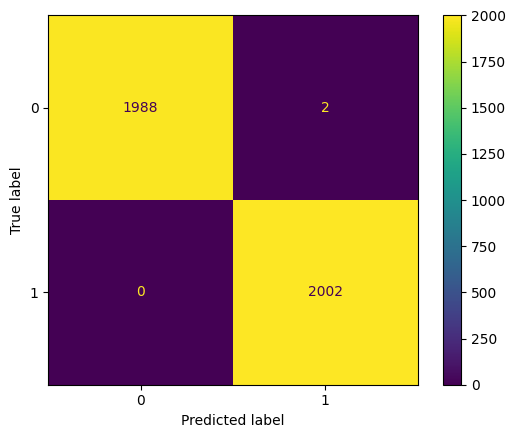

In [28]:
ConfusionMatrixDisplay.from_predictions(Ytest,Ypred)

In [29]:
print(f'accuracy score: {accuracy_score(Ytest,Ypred)}')
print(classification_report(Ytest,Ypred))

accuracy score: 0.999498997995992
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1990
           1       1.00      1.00      1.00      2002

    accuracy                           1.00      3992
   macro avg       1.00      1.00      1.00      3992
weighted avg       1.00      1.00      1.00      3992



In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
classifierKNN = KNeighborsClassifier()

In [48]:
classifierKNN.fit(Xtrain,Ytrain)

KNeighborsClassifier()

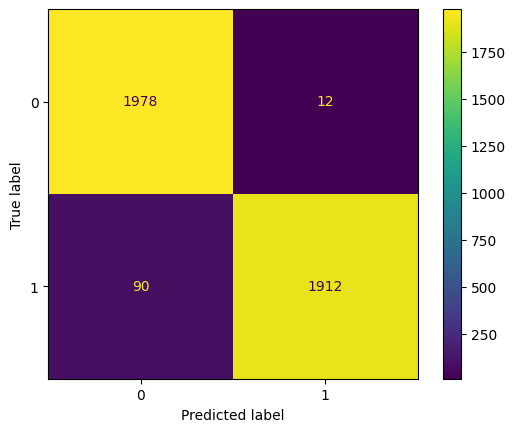

In [49]:
Ypred = classifierKNN.predict(Xtest)
ConfusionMatrixDisplay.from_predictions(Ytest,Ypred)

In [50]:
print(f'accuracy score: {accuracy_score(Ytest,Ypred)}')
print(classification_report(Ytest,Ypred))

accuracy score: 0.9744488977955912
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1990
           1       0.99      0.96      0.97      2002

    accuracy                           0.97      3992
   macro avg       0.98      0.97      0.97      3992
weighted avg       0.98      0.97      0.97      3992

